In [1]:
!date

Wed Jan  4 12:13:38 PST 2023


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/SCVI


In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#adata_10X = sc.read_h5ad('/c4/home/derek/data1/HDD-2/derek/SLR_temp/CAT_20220904_PBMC/concat.3.new.h5ad')

In [5]:
adata_10X = sc.read_10x_h5('/c4/home/derek/data1/derek/data_scSLR/PBMC/fastqs/PBMC/outs/raw_feature_bc_matrix.h5')

/c4/home/derek/miniconda3/envs/SCVI/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
adata_10X

AnnData object with n_obs × n_vars = 16473 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [7]:
adata_10X = adata_10X[:,adata_10X.var['feature_types'] == 'Gene Expression']

In [8]:
adata_SLR = sc.read_mtx('/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_5prime/Solo.out/GeneFull/raw/matrix.mtx').T

adata_SLR.var_names = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_5prime/Solo.out/GeneFull/raw/features.tsv',
            sep='\t',header=None)[1]

adata_SLR.obs_names = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_5prime/Solo.out/GeneFull/raw/barcodes.tsv',
            sep='\t',header=None)[0]

In [9]:
adata_10X.obs_names

Index(['AAACCTGAGACAAGCC-1', 'AAACCTGAGATATGCA-1', 'AAACCTGAGATCCTGT-1',
       'AAACCTGAGCTGATAA-1', 'AAACCTGAGGATGGTC-1', 'AAACCTGAGGTCGGAT-1',
       'AAACCTGAGTACGTTC-1', 'AAACCTGAGTCAAGCG-1', 'AAACCTGAGTCGAGTG-1',
       'AAACCTGAGTCGCCGT-1',
       ...
       'TTTGTCAGTTAAGAAC-1', 'TTTGTCAGTTCACCTC-1', 'TTTGTCAGTTCAGCGC-1',
       'TTTGTCAGTTCGTGAT-1', 'TTTGTCAGTTCTGAAC-1', 'TTTGTCAGTTGATTGC-1',
       'TTTGTCAGTTTACTCT-1', 'TTTGTCATCAGGCGAA-1', 'TTTGTCATCGGCATCG-1',
       'TTTGTCATCTGAGGGA-1'],
      dtype='object', length=16473)

In [10]:
adata_SLR

AnnData object with n_obs × n_vars = 737280 × 36385

In [11]:
adata_10X

View of AnnData object with n_obs × n_vars = 16473 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [12]:
adata_10X.obs_names

Index(['AAACCTGAGACAAGCC-1', 'AAACCTGAGATATGCA-1', 'AAACCTGAGATCCTGT-1',
       'AAACCTGAGCTGATAA-1', 'AAACCTGAGGATGGTC-1', 'AAACCTGAGGTCGGAT-1',
       'AAACCTGAGTACGTTC-1', 'AAACCTGAGTCAAGCG-1', 'AAACCTGAGTCGAGTG-1',
       'AAACCTGAGTCGCCGT-1',
       ...
       'TTTGTCAGTTAAGAAC-1', 'TTTGTCAGTTCACCTC-1', 'TTTGTCAGTTCAGCGC-1',
       'TTTGTCAGTTCGTGAT-1', 'TTTGTCAGTTCTGAAC-1', 'TTTGTCAGTTGATTGC-1',
       'TTTGTCAGTTTACTCT-1', 'TTTGTCATCAGGCGAA-1', 'TTTGTCATCGGCATCG-1',
       'TTTGTCATCTGAGGGA-1'],
      dtype='object', length=16473)

In [13]:
#adata_10X = adata_10X[adata_10X.obs_names.str.endswith('-1-22')]
adata_10X.obs_names = adata_10X.obs_names.str[:-2]

/c4/home/derek/miniconda3/envs/SCVI/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [14]:
adata_SLR= adata_SLR[adata_SLR.obs_names.isin(adata_10X.obs_names)]

In [15]:
adata_10X.var_names_make_unique()
adata_SLR.var_names_make_unique()

In [16]:
adata_SLR = adata_SLR[:,adata_SLR.var_names.isin(adata_10X.var_names)]
adata_10X = adata_10X[:,adata_10X.var_names.isin(adata_SLR.var_names)]

In [17]:
sc.pp.calculate_qc_metrics(adata_10X,inplace=True)
sc.pp.calculate_qc_metrics(adata_SLR,inplace=True)

/c4/home/derek/miniconda3/envs/SCVI/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/c4/home/derek/miniconda3/envs/SCVI/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


In [18]:
adata_10X.X.sum(axis=0)

matrix([[ 0., 18.,  0., ...,  0.,  9.,  2.]], dtype=float32)

In [19]:
values = np.vstack([adata_SLR.var.log1p_total_counts,
                    adata_10X.var.log1p_total_counts])
kernel = stats.gaussian_kde(values)(values)


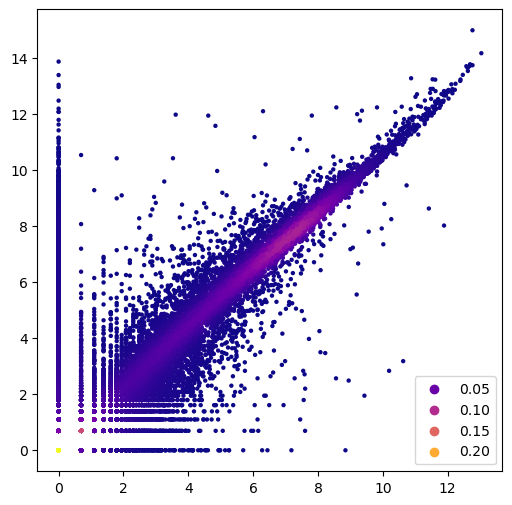

In [31]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))

n = sns.scatterplot(x=values[0],
            y=values[1],
            s=10,
            linewidth=0,
            hue=kernel,
            palette='plasma',
            ax=ax,
           )

# ax.get_legend().remove()
# ax.figure.colorbar(n)


In [32]:
stats.pearsonr(x=adata_SLR.var.log1p_total_counts,
            y=adata_10X.var.log1p_total_counts,)

PearsonRResult(statistic=0.8633545264421134, pvalue=0.0)